In [1]:

import matplotlib.pyplot as plt
import numpy as np


In [2]:
def conv1d(a, w, b = 0, stride = 1, pad = 0):
    """
    compute 1d convolutional (with bias)
    """
    w_old = a.shape[0]
    f = w.shape[0]
    a_pad = np.pad(a, pad_width=pad, mode = 'constant', constant_values = 0)
    w_new = int((w_old - f + 2*pad)/stride) + 1 
    a_res = np.zeros((w_new))
    for i in range(w_new):
        start = i*stride
        end = start + f
        a_res[i] = np.sum(a_pad[start:end]*w) + b 
    return a_res 

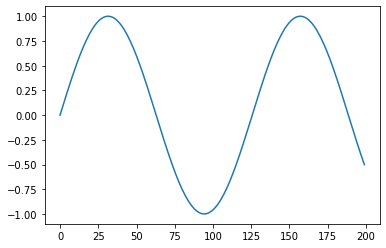

In [4]:
N = 200
x_clean = np.sin(np.arange(N)/20.)
fig = plt.plot(x_clean)
plt.show()

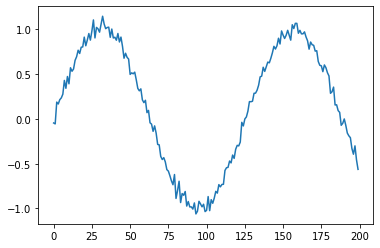

In [6]:
x_noisy = x_clean + .05*np.random.randn(N)
fig = plt.plot(x_noisy)
plt.show()

In [10]:
w = 1./4*np.ones(4)
w

array([0.25, 0.25, 0.25, 0.25])

197


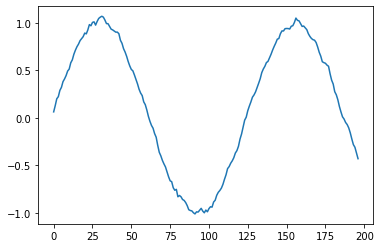

In [15]:

x_filtered = conv1d(x_noisy, w)
print(x_filtered.size)
fig = plt.plot(x_filtered)
plt.show()